In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [2]:
#reading
df = pd.read_csv('Trendyol_Sales_Data_Dirty.csv')

In [3]:
df.shape
#(1100, 14)


(1100, 14)

In [4]:
df.head()

,YEAR,month,CITY,CatEgory,PayMent_methoD,DEVICE_type,PROMOTion_used,CustSegment,ORDer_Value,Items sold,shipping_cost,Delivery_time,Product_rating,DiscOUNt
0,2020.0,4.0,@Bursa,NaN,Cr3dit C@rd,D3sktop,@Yes,@New,477.75,10.0,32.34 TRY,6.0,4.7,113.97
1,2023.0,11.0,@NA,Toys,Debit Card,Desktop,No,@Returning,369.63,4.0,34.56 TRY,2.0,4.6,103.36
2,2011.0,5.0,Samsun,@NA,E-W@ll3t,Desktop,No,@Returning,264.94,3.0,24.97 TRY,3.0,3.4,22.84
3,2017.0,2.0,diyarbakir,clothing,@E-Wallet,Mobil3,YES,@NA,353.31,8.0,36.25 TRY,4.0,3.6,59.85
4,2013.0,6.0,BURSA,NaN,CREDIT CARD,Desktop,YES,@Returning,NaN,6.0,43.16 TRY,4.0,4.2,7.82


<Axes: >

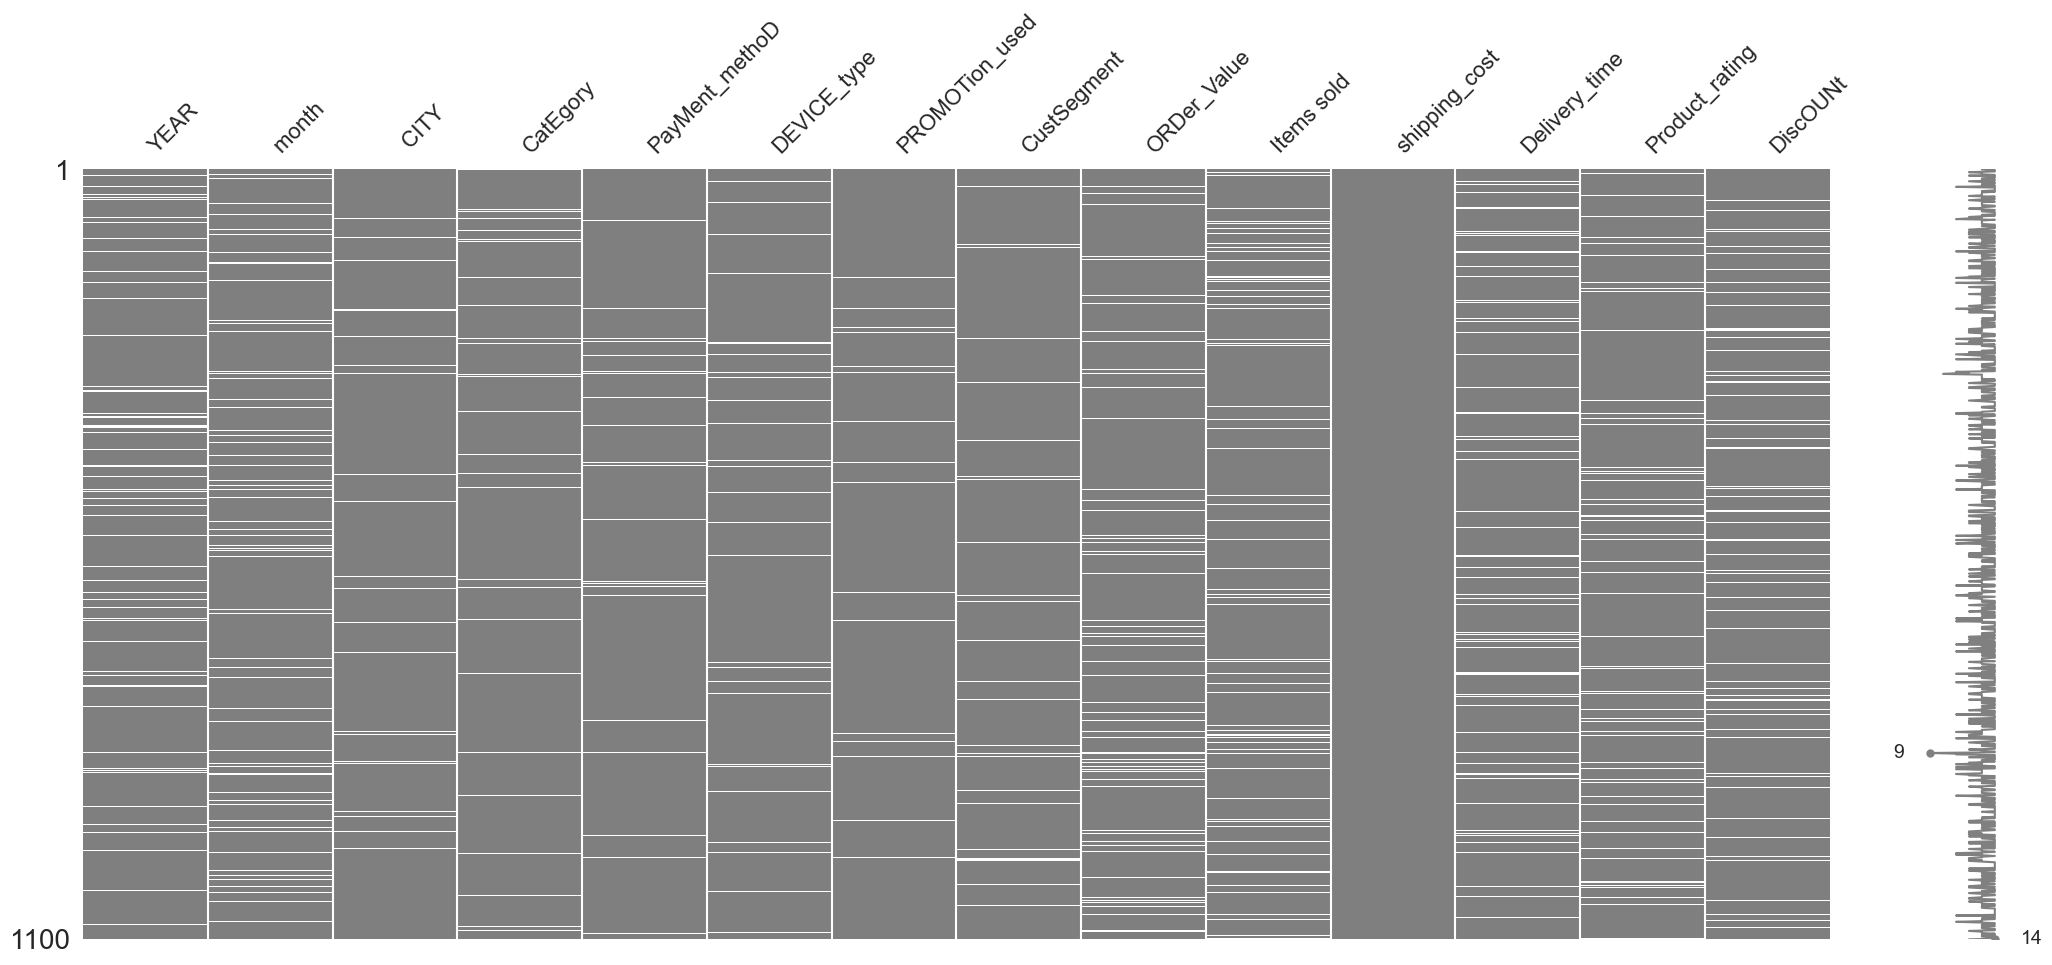

In [5]:
msno.matrix(df, color = (0.5, 0.5, 0.5))

In [6]:
df.tail()

,YEAR,month,CITY,CatEgory,PayMent_methoD,DEVICE_type,PROMOTion_used,CustSegment,ORDer_Value,Items sold,shipping_cost,Delivery_time,Product_rating,DiscOUNt
1095,2019.0,6.0,diyarbakir,@Beauty,DEBIT CARD,Desktop,NA,@Returning,369.58,NaN,18.53 TRY,1.0,4.1,96.98
1096,2017.0,12.0,Ad@n@,Clothing,E-W@ll3t,Tablet,@Yes,returning,308.40,9.0,26.38 TRY,2.0,4.3,35.76
1097,2019.0,8.0,konya,@Home,credit card,@Desktop,Y3s,RETURNING,446.99,7.0,58.41 TRY,7.0,3.1,94.61
1098,2013.0,4.0,ANKARA,Clothing,@Debit Card,DESKTOP,@Yes,@New,454.18,3.0,63.72 TRY,4.0,3.8,51.76
1099,2016.0,3.0,Kony@,clothing,na,tablet,@No,@New,202.42,NaN,14.81 TRY,6.0,NaN,48.62


In [7]:
df.describe()


,YEAR,month,ORDer_Value,Items sold,Delivery_time,Product_rating,DiscOUNt
count,1024.000000,1013.000000,1015.000000,1000.000000,1011.000000,1014.000000,1015.000000
mean,2016.387695,6.593287,284.198039,5.598000,4.057369,3.986588,44.229665
std,4.052091,3.443565,128.439806,2.764786,1.971247,0.567321,33.676211
min,2010.000000,1.000000,50.530000,1.000000,1.000000,3.000000,0.180000
25%,2013.000000,4.000000,174.585000,3.000000,2.000000,3.500000,16.865000
50%,2016.000000,7.000000,287.700000,6.000000,4.000000,4.000000,35.670000
75%,2020.000000,10.000000,394.640000,8.000000,6.000000,4.500000,66.430000
max,2023.000000,12.000000,499.760000,10.000000,7.000000,5.000000,145.120000


In [8]:
# removed empty spaces the columns names
df.columns = df.columns.str.strip() 
df = df.apply(lambda x: x.str.replace(r'\s+', ' ', regex=True) if x.dtype == "object" else x)

In [9]:
df.rename(columns={
    'YEAR': 'year',
    "CITY":"city",
    'month': 'month',
    'CatEgory': 'category',
    'PayMent_methoD': 'payment_method',
    'DEVICE_type': 'device_type',
    'PROMOTion_used': 'promotion_used',
    'CustSegment': 'customer_segment',
    'ORDer_Value': 'order_value',
    'Items sold': 'sold_items',
    'shipping_cost': 'shipping_cost',
    'Delivery_time': 'delivery_time',
    'Product_rating': 'product_rating',
    'DiscOUNt': 'discount'
}, inplace=True) # changed the names of the columns

In [10]:
columns_to_object = ['year', 'month','city','category','payment_method','device_type','promotion_used','customer_segment']
df[columns_to_object] = df[columns_to_object].astype('object') #changed datatypes

In [11]:
df['shipping_cost'] = df['shipping_cost'].replace({'TRY': '', '₺': ''}, regex=True) #removed TRY

In [12]:
columns_to_float = ['order_value', 'sold_items','shipping_cost','delivery_time','product_rating','discount']
df[columns_to_float] = df[columns_to_float].apply(pd.to_numeric, errors='coerce') #changed datatypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1024 non-null   object 
 1   month             1013 non-null   object 
 2   city              1067 non-null   object 
 3   category          1063 non-null   object 
 4   payment_method    1070 non-null   object 
 5   device_type       1058 non-null   object 
 6   promotion_used    1070 non-null   object 
 7   customer_segment  1061 non-null   object 
 8   order_value       1015 non-null   float64
 9   sold_items        1000 non-null   float64
 10  shipping_cost     1018 non-null   float64
 11  delivery_time     1011 non-null   float64
 12  product_rating    1014 non-null   float64
 13  discount          1015 non-null   float64
dtypes: float64(6), object(8)
memory usage: 120.4+ KB


In [14]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1)) # combine month and year and assign day 1

In [15]:
df.drop(['year', 'month'], axis=1, inplace=True)
#dropped year and month

In [16]:
# Şehir isimlerini düzeltme
df['city'] = df['city'].str.replace('@', '').str.title().str.strip()

# Kategori sütunundaki "@NA" değerlerini NaN yapma
df['category'] = df['category'].replace({'@NA': np.nan}).str.title().str.strip()

# Ödeme yöntemlerini düzeltme
df['payment_method'] = df['payment_method'].replace({
    'Cr3dit C@rd': 'Credit Card',
    'E-W@ll3t': 'E-Wallet',
    '@E-Wallet': 'E-Wallet',
    'CREDIT CARD': 'Credit Card'
}).str.title().str.strip()

# Cihaz isimlerini düzeltme
df['device_type'] = df['device_type'].replace({
    'D3sktop': 'Desktop',
    'Mobil3': 'Mobile'
}).str.title().str.strip()

# Abonelik durumunu düzeltme
df['promotion_used'] = df['promotion_used'].str.replace('@', '').str.title().str.strip()

# Müşteri tipi sütunundaki "@New" ve "@Returning" değerlerini düzeltme
df['customer_segment'] = df['customer_segment'].str.replace('@', '').str.title().str.strip()

# Fiyat sütunundaki "TRY" metnini kaldırma ve sayıya çevirme


In [27]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

city                 0.000000
category             5.090909
payment_method       2.727273
device_type          3.818182
promotion_used       2.727273
customer_segment     3.545455
order_value          7.727273
sold_items           9.090909
shipping_cost        7.454545
delivery_time        8.090909
product_rating       7.818182
discount             7.727273
date                14.454545
dtype: float64

In [18]:
#  # of missing values in city column
df['city'].isna().sum()

np.int64(33)

In [19]:
nonValue = ["@na","NaN","@NA","na","NA","none","None","empty","NONE",None,""]
df = df.replace(nonValue ,np.nan) # converted NaN all null values.

In [20]:
# we have 33 missing values and we filled with mode
modeCity = df["city"].mode()[0]
df["city"] = df["city"].fillna(modeCity)

In [21]:
df["city"].isnull().sum()

np.int64(0)

In [22]:
df['city'].unique()

array(['Bursa', 'Na', 'Samsun', 'Diyarbakir', 'Smsun', 'Istanbul',
       'Trbzon', 'Malatya', 'Gaziantep', 'Van', 'Kayseri', 'Trabzon',
       'Konya', 'Eskişehir', 'Ankara', 'Izmir', 'Eskiş3Hir', 'Adana',
       'Burs', 'Mlty', 'Vn', 'Kys3Ri', 'Antalya', 'Ankr', 'Mersin', 'Adn',
       'M3Rsin', 'Diyrbkir', 'Istnbul', 'Gzint3P', 'Antly', 'Kony'],
      dtype=object)

In [23]:
df["city"] = df["city"].replace({"Na":modeCity,
                                     "Diyarbakir":"Diyarbakır",
                                     "Smsun":"Samsun",
                                     "Istanbul":"İstanbul",
                                     "Trbzon":"Trabzon",
                                     "Izmir":"İzmir",
                                     "Eskiş3Hir":"Eskişehir",
                                     "Burs":"Bursa",
                                     "Mlty":"Malatya",
                                     "Vn":"Van",
                                     "Kys3Ri":"Kayseri",
                                     "Ankr":"Ankara",
                                     "Adn":"Adana",
                                     "M3Rsin":"Mersin",
                                     "Diyrbkir":"Diyarbakır",
                                     "Istnbul":"İstanbul",
                                     "Gzint3P":"Gazientep",
                                     "Antly":"Antalya",
                                    "Kony":"Konya"})

In [24]:
print(df['city'].unique())

['Bursa' 'Van' 'Samsun' 'Diyarbakır' 'İstanbul' 'Trabzon' 'Malatya'
 'Gaziantep' 'Kayseri' 'Konya' 'Eskişehir' 'Ankara' 'İzmir' 'Adana'
 'Antalya' 'Mersin' 'Gazientep']


In [25]:
df.head()

,city,category,payment_method,device_type,promotion_used,customer_segment,order_value,sold_items,shipping_cost,delivery_time,product_rating,discount,date
0,Bursa,NaN,Credit Card,Desktop,Yes,New,477.75,10.0,32.34,6.0,4.7,113.97,2020-04-01
1,Van,Toys,Debit Card,Desktop,No,Returning,369.63,4.0,34.56,2.0,4.6,103.36,2023-11-01
2,Samsun,NaN,E-Wallet,Desktop,No,Returning,264.94,3.0,24.97,3.0,3.4,22.84,2011-05-01
3,Diyarbakır,Clothing,E-Wallet,Mobile,Yes,Na,353.31,8.0,36.25,4.0,3.6,59.85,2017-02-01
4,Bursa,NaN,Credit Card,Desktop,Yes,Returning,NaN,6.0,43.16,4.0,4.2,7.82,2013-06-01
